In [2]:
# Import required lobraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('bigdatamart_Train.csv')

In [4]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [8]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

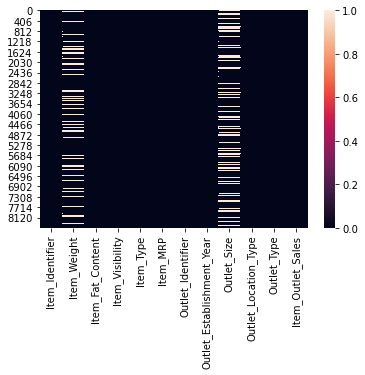

In [10]:
sns.heatmap(df.isnull())

In [11]:
df['Item_Weight'].isnull().mean()  #  17% data missing in Item_Weight column

0.1716531737651062

In [12]:
df['Outlet_Size'].isnull().mean()   #  28% data missing in Outlet_size column

0.2827642848762173

# Item vs Sales

In [13]:
df['Item_Identifier'].nunique()  # code for item, unique 1559 items in the Mart

1559

In [14]:
df['Item_Type'].nunique()   #  item category, unique category of items in the mart

16

In [15]:
df.groupby('Item_Type')['Item_Identifier'].count()

Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Identifier, dtype: int64

In [16]:
df.groupby(['Item_Type','Item_Identifier']).count()

Item_Weight  Item_Fat_Content  Item_Visibility  \
Item_Type     Item_Identifier                                                   
Baking Goods  FDA11                      4                 5                5   
              FDA23                      5                 6                6   
              FDA35                      3                 4                4   
              FDA36                      2                 4                4   
              FDA47                      5                 6                6   
...                                    ...               ...              ...   
Starchy Foods FDG59                      5                 6                6   
              FDH35                      5                 6                6   
              FDH47                      6                 6                6   
              FDI35                      3                 3                3   
              FDZ34                      3                 3                3   

                               Item_MRP  Outlet_Identifier  \
Item_Type     Item_Identifier                                
Baking Goods  FDA11                   5                  5   
              FDA23                   6                  6   
              FDA35                   4                  4   
              FDA36                   4                  4   
              FDA47                   6                  6   
...                                 ...                ...   
Starchy Foods FDG59                   6                  6   
              FDH35                   6                  6   
              FDH47                   6                  6   
              FDI35                   3                  3   
              FDZ34                   3                  3   

                               Outlet_Establishment_Year  Outlet_Size  \
Item_Type     Item_Identifier                                           
Baking Goods  FDA11                                    5            3   
              FDA23                                    6            5   
              FDA35                                    4            3   
              FDA36                                    4            3   
              FDA47                                    6            4   
...                                                  ...          ...   
Starchy Foods FDG59                                    6            4   
              FDH35                                    6            3   
              FDH47                                    6            4   
              FDI35                                    3            3   
              FDZ34                                    3            3   

                               Outlet_Location_Type  Outlet_Type  \
Item_Type     Item_Identifier                                      
Baking Goods  FDA11                               5            5   
              FDA23                               6            6   
              FDA35                               4            4   
              FDA36                               4            4   
              FDA47                               6            6   
...                                             ...          ...   
Starchy Foods FDG59                               6            6   
              FDH35                               6            6   
              FDH47                               6            6   
              FDI35                               3            3   
              FDZ34                               3            3   

                               Item_Outlet_Sales  
Item_Type     Item_Identifier                     
Baking Goods  FDA11                            5  
              FDA23                            6  
              FDA35                            4  
              FDA36                            4  
              FDA47          

In [17]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [18]:
# Main Items in Mart
label=df['Item_Type'].value_counts().index
value=df['Item_Type'].value_counts().values

([<matplotlib.patches.Wedge at 0x1e6fe6921c0>,
 [Text(0.9885134290668446, 0.4825362168319687, 'Fruits and Vegetables'),
  Text(0.24030971243089047, 1.0734296633274967, 'Snack Foods'),
  Text(-0.5819825343166728, 0.9334325523305597, 'Household'),
  Text(-1.0285786969861261, 0.3899049423979169, 'Frozen Foods'),
  Text(-1.077062377695873, -0.22346506338153288, 'Dairy'),
  Text(-0.8447302131430985, -0.7045785030805407, 'Canned'),
  Text(-0.42586341218777557, -1.0142190858782856, 'Baking Goods'),
  Text(0.03628228530275769, -1.099401471607715, 'Health and Hygiene'),
  Text(0.4168746716474865, -1.0179467118365286, 'Soft Drinks'),
  Text(0.716494856094164, -0.83464670441487, 'Meat'),
  Text(0.900194282333554, -0.6321789731191458, 'Breads'),
  Text(0.994829306903044, -0.46937687429911723, 'Hard Drinks'),
  Text(1.0509763124562066, -0.3247287955447658, 'Others'),
  Text(1.0816671190247293, -0.19999060883137015, 'Starchy Foods'),
  Text(1.0957698794777586, -0.0963761963832281, 'Breakfast'),
  Te

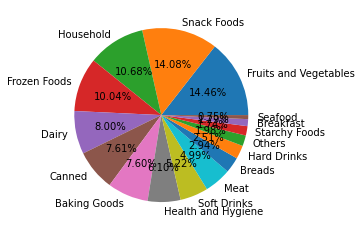

In [19]:
plt.pie(value,labels=label,autopct='%.2f%%')

In [20]:
df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()

Item_Fat_Content
LF         2073.551928
Low Fat    2164.477336
Regular    2235.186702
low fat    2087.740737
reg        1962.192268
Name: Item_Outlet_Sales, dtype: float64

In [21]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [22]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [23]:
df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()

Item_Fat_Content
LF         2073.551928
Low Fat    2164.477336
Regular    2235.186702
low fat    2087.740737
reg        1962.192268
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

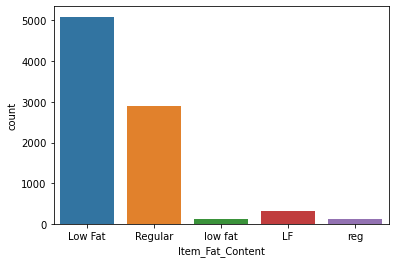

In [24]:
#Conclusion:  Low Fat and Regular have same sale revenue

sns.countplot('Item_Fat_Content',data=df)

In [25]:
# conclusion: Although Low fat item has been sold more in quantity  but sale revenue of both is almost equal
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

([<matplotlib.patches.Wedge at 0x1e6fe7a3550>,
 [Text(-0.33034137696485943, 1.049225702442025, 'Low Fat'),
  Text(0.11433620861487603, -1.094041695457525, 'Regular'),
  Text(1.0555357081801762, -0.30958741698682507, 'LF'),
  Text(1.0913221150223238, -0.13789866302180814, 'reg'),
  Text(1.0990627609782055, -0.04539876023598057, 'low fat')],
 [Text(-0.18018620561719603, 0.5723049286047408, '59.71%'),
  Text(0.06236520469902328, -0.5967500157041045, '33.90%'),
  Text(0.5757467499164596, -0.16886586381099547, '3.71%'),
  Text(0.5952666081939947, -0.07521745255734988, '1.37%'),
  Text(0.5994887787153848, -0.024762960128716673, '1.31%')])

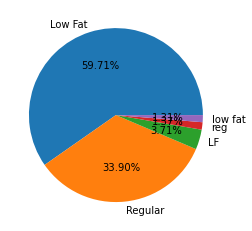

In [26]:
plt.pie(df['Item_Fat_Content'].value_counts().values,labels=df['Item_Fat_Content'].value_counts().index,autopct='%.2f%%')

In [27]:
# COnclusion:  obvious, health concious peoples like to buy low Fat items

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

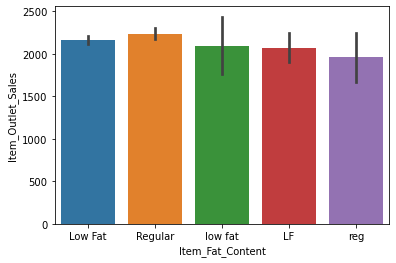

In [28]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales', data=df)

In [29]:
# Sales revenue of Low fat and High fat is almost same.

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
#  Item_Fat_Content     VS   Item_Visibility  in store
df.groupby('Item_Fat_Content')['Item_Visibility'].mean()

Item_Fat_Content
LF         0.066628
Low Fat    0.064166
Regular    0.069564
low fat    0.065300
reg        0.066361
Name: Item_Visibility, dtype: float64

In [32]:
# Item type vs Fat content
df.groupby(['Item_Fat_Content','Item_Type']).count()

Item_Identifier  Item_Weight  \
Item_Fat_Content Item_Type                                             
LF               Baking Goods                        20           14   
                 Breads                               8            5   
                 Breakfast                            2            2   
                 Canned                              17           16   
                 Dairy                               24           23   
...                                                 ...          ...   
reg              Fruits and Vegetables               25           25   
                 Meat                                 7            7   
                 Snack Foods                         23           22   
                 Soft Drinks                          1            1   
                 Starchy Foods                        7            6   

                                        Item_Visibility  Item_MRP  \
Item_Fat_Content Item_Type                                          
LF               Baking Goods                        20        20   
                 Breads                               8         8   
                 Breakfast                            2         2   
                 Canned                              17        17   
                 Dairy                               24        24   
...                                                 ...       ...   
reg              Fruits and Vegetables               25        25   
                 Meat                                 7         7   
                 Snack Foods                         23        23   
                 Soft Drinks                          1         1   
                 Starchy Foods                        7         7   

                                        Outlet_Identifier  \
Item_Fat_Content Item_Type                                  
LF               Baking Goods                          20   
                 Breads                                 8   
                 Breakfast                              2   
                 Canned                                17   
                 Dairy                                 24   
...                                                   ...   
reg              Fruits and Vegetables                 25   
                 Meat                                   7   
                 Snack Foods                           23   
                 Soft Drinks                            1   
                 Starchy Foods                          7   

                                        Outlet_Establishment_Year  \
Item_Fat_Content Item_Type                                          
LF               Baking Goods                                  20   
                 Breads                                         8   
                 Breakfast                                      2   
                 Canned                                        17   
                 Dairy                                         24   
...                                                           ...   
reg              Fruits and Vegetables                         25   
                 Meat                                           7   
                 Snack Foods                                   23   
                 Soft Drinks                                    1   
                 Starchy Foods                                  7   

                                        Outlet_Size  Outlet_Location_Type  \
Item_Fat_Content Item_Type                                                  
LF               Baking Goods                    16                    20   
                 Breads                           7                     8   
                 Breakfast                        2                     2   
                 Canned                          17                    17   
                 Dairy                           14

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

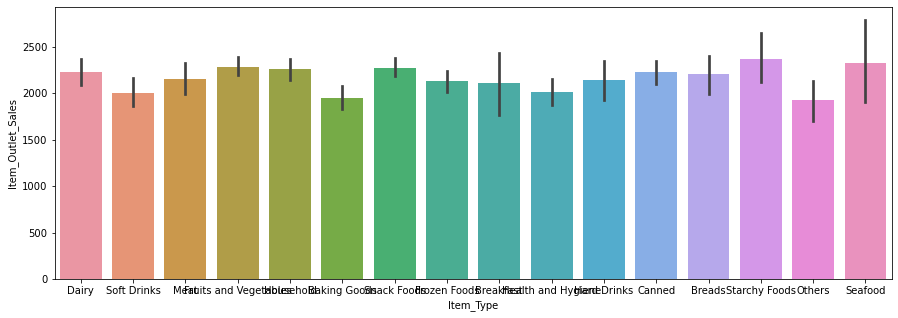

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales', data=df)

In [34]:
df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

In [35]:
# Items types who sold more Starchy food, seafood, Fruits $ vegitables, snacks foods
# household

# Outlet_Identifier

In [36]:
df['Outlet_Identifier'].nunique()

10

In [37]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [38]:
# We have total 10 store, with different code

In [39]:
df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

Outlet_Identifier
OUT027    3694.038558
OUT035    2438.841866
OUT049    2348.354635
OUT017    2340.675263
OUT013    2298.995256
OUT046    2277.844267
OUT045    2192.384798
OUT018    1995.498739
OUT019     340.329723
OUT010     339.351662
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

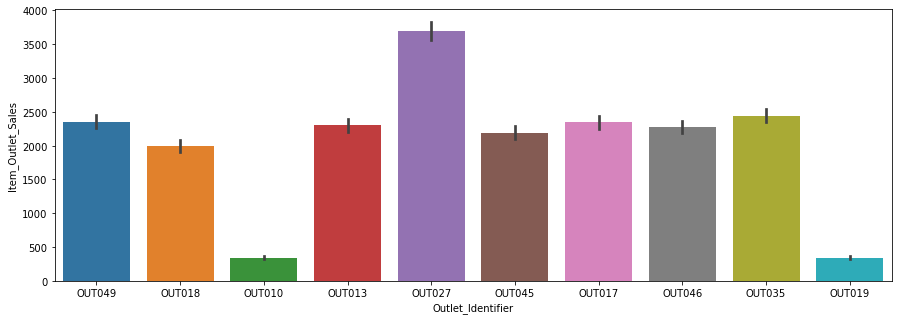

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df)

In [41]:
#Outlet    vs  Sale
#OUT027    3694.038558
#OUT035    2438.841866
#OUT049    2348.354635
#OUT017    2340.675263
#OUT013    2298.995256
#OUT046    2277.844267
#OUT045    2192.384798
#OUT018    1995.498739
#OUT019     340.329723
#OUT010     339.351662

# Outlet_Size

In [42]:
df['Outlet_Size'].nunique()

3

In [43]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [44]:
df['Outlet_Size'].isnull().sum()

2410

In [45]:
df.shape

(8523, 12)

In [46]:
(2410/8523)*100

28.27642848762173

In [47]:
# 28.27% data is missing in 'Outlet_Size'

In [48]:
df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [49]:
# From available data, Mediam size store have high sale, then High size and then small size outlet

In [50]:
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

# Outlet size vs Sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

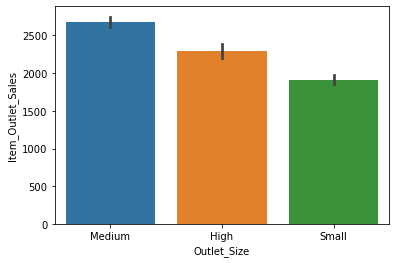

In [51]:
# does outlet size have any relation with total sales.
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

In [52]:
# Medium size outlets are making more sales

# Outlet_Location_Type vs sales

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

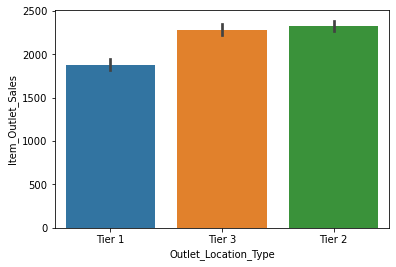

In [53]:
# does outlet location have any relation with total sales.
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)

In [54]:
# Tier 2 and Tier 3 location have more slaes/ seems middle class family area, where large families are living having more requirements

# Outlet_Type vs sales

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

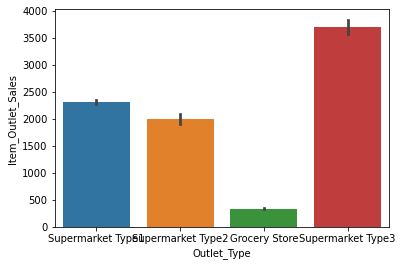

In [55]:
# does outlet type have any relation with total sales.
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)

In [56]:
# Supermarket type 3 have more sale, size is Medium
# Grocery are small in size, have less sales

# Outlet_Establishment_Year vs sales

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

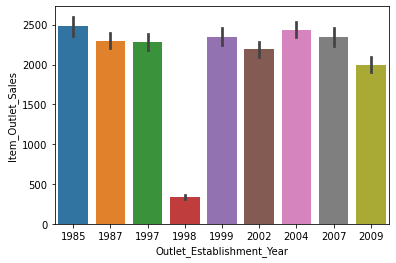

In [57]:
# does year establishment have effect on sales

sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df)

In [58]:
# Not a big effect, although store establish in 1998 are not doing sales good enough

In [59]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Analysis

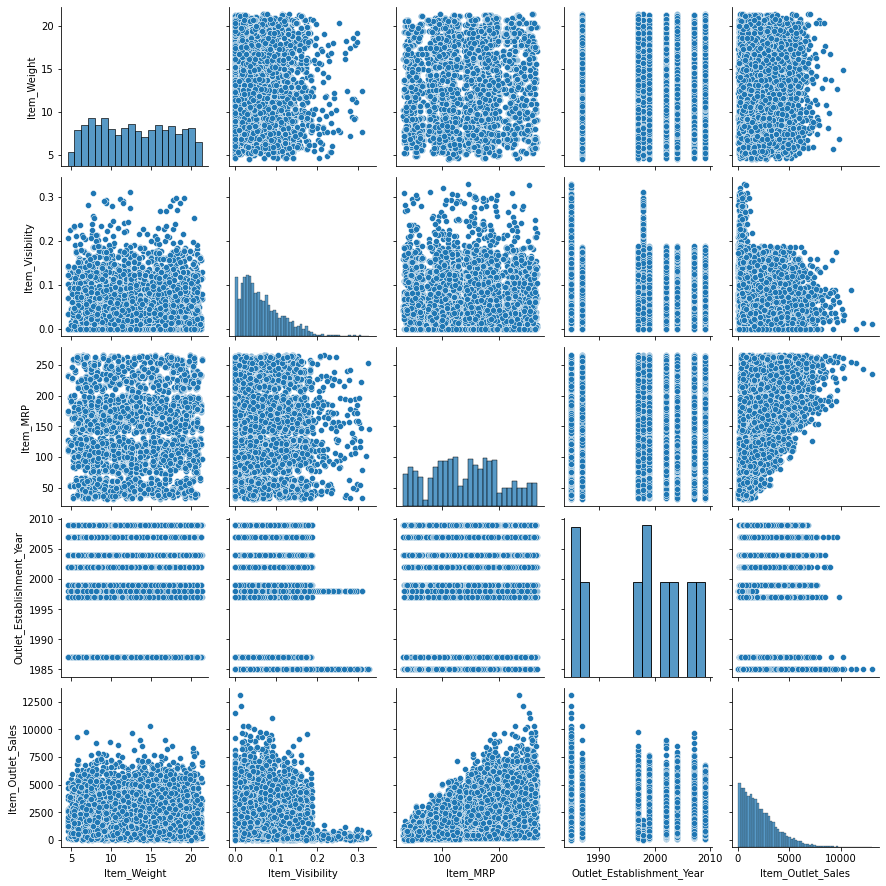

In [60]:
sns.pairplot(df)

In [61]:
# column dont have straight relation with target variable

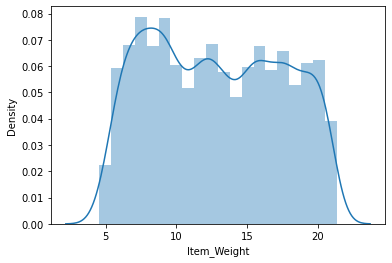

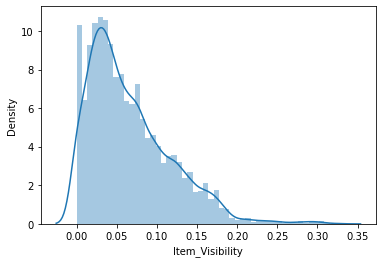

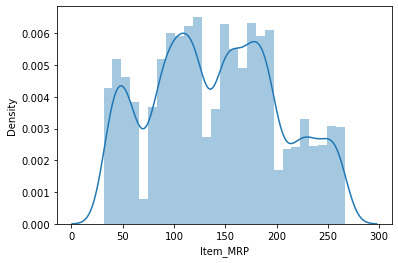

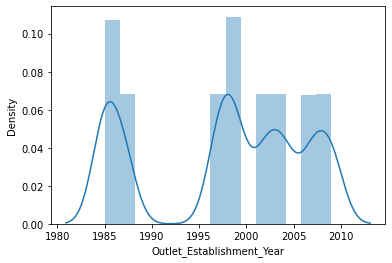

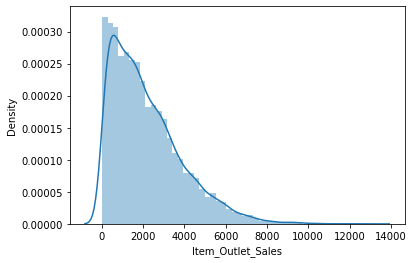

In [62]:
num=df.select_dtypes(np.number)
for i in num.columns:
    sns.distplot(df[i])
    plt.show()

In [63]:
# conclusion:  Item weight does have normal distribution
# Item Visiblity is right skewed data
#Item MRP not at all normal distribution
# Year od establishment have 2 peaks
#oulet sales is right skewed data

# Handle Null Values()

<AxesSubplot:>

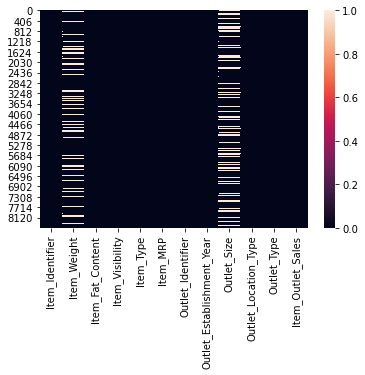

In [64]:
sns.heatmap(df.isnull())

In [65]:
# we have checked above for Outlet Size column, It have a kind of relation with Store type so on basis,
# we will impute where type is Grocery, size will be small, because nonnull values are all small
#where type is SuperMarket type 1, non null size is all type, big,medium,small..so will fill with mode here that is small

In [66]:
# Lets try to handle missing values here

temp=df[['Outlet_Identifier','Outlet_Size']]

In [67]:
temp

,Outlet_Identifier,Outlet_Size
0,OUT049,Medium
1,OUT018,Medium
2,OUT049,Medium
3,OUT010,NaN
4,OUT013,High
...,...,...
8518,OUT013,High
8519,OUT045,NaN
8520,OUT035,Small
8521,OUT018,Medium


In [68]:
null_size=df[temp.isnull().any(axis=1)]

In [69]:
null_size['Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [70]:
# These 3 Outlet_Identifier  have Null Outlet_Size

In [71]:
df[df['Outlet_Identifier']=='OUT010']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744


In [72]:
temp=df[df['Outlet_Size'].notnull()]

In [73]:
temp['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT013', 'OUT027', 'OUT046', 'OUT035',
       'OUT019'], dtype=object)

In [74]:
# array(['OUT010', 'OUT045', 'OUT017']  have size null()

In [75]:
# Try to find relation of Size with Outlet_Type

In [76]:
df['Outlet_Type'].unique()  # have 4 unique values

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [77]:
df[df['Outlet_Type']=='Grocery Store']['Outlet_Size'].unique()

array([nan, 'Small'], dtype=object)

In [78]:
# Outlet type is Grocery Store,..  Size is Small or Nan

In [79]:
df[df['Outlet_Type']=='Supermarket Type1']['Outlet_Size'].unique()

array(['Medium', 'High', nan, 'Small'], dtype=object)

In [80]:
df[df['Outlet_Type']=='Supermarket Type2']['Outlet_Size'].unique()

array(['Medium'], dtype=object)

In [81]:
df[df['Outlet_Type']=='Supermarket Type3']['Outlet_Size'].unique()

array(['Medium'], dtype=object)

In [82]:
# conclusion: Where type is Grocery, there size will be small
# where type is supermarlet 1 , there i will use Mode

In [83]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [84]:
df['Outlet_Size']=np.where(df['Outlet_Type']=='Grocery Store',df['Outlet_Size'].fillna('Small'),df['Outlet_Size'])

In [85]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [86]:
df[df['Outlet_Type']=='Supermarket Type1']['Outlet_Size'].value_counts()

Small     1860
High       932
Medium     930
Name: Outlet_Size, dtype: int64

In [87]:
# where type is grocery, its all Small, where type is Supermarket type 1, mode is small... lets fill Type null with small only

In [88]:
df['Outlet_Size']=np.where(df['Outlet_Type']=='Supermarket Type1',df['Outlet_Size'].fillna('Small'),df['Outlet_Size'])

In [89]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [90]:
df['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [91]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [92]:
df['Item_Weight'].nunique()

415

# FIll Item_Weight Null values

In [93]:
# trying to find out the relation

df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [94]:
df['Item_Weight'].isnull().mean()  # 17% data is missing

0.1716531737651062

In [95]:
df['Item_Identifier'].nunique()

1559

In [96]:
df[df['Item_Weight'].notnull()]['Item_Identifier'].nunique()

1555

In [97]:
df[df['Item_Weight'].isnull()]['Item_Identifier'].nunique()

1142

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

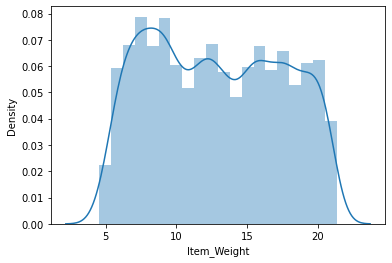

In [98]:
sns.distplot(df['Item_Weight'])

In [99]:
# data is not skewed but not uniform as well

In [100]:
weight_null=df[df['Item_Weight'].isnull()]

In [101]:
weight_notnull= df[df['Item_Weight'].notnull()]

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Weight'>

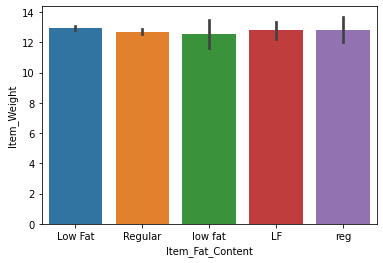

In [102]:
sns.barplot(x='Item_Fat_Content',y='Item_Weight',data=weight_notnull )

In [103]:
# Fat content have no relation on weight both seems of equal weight

In [104]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

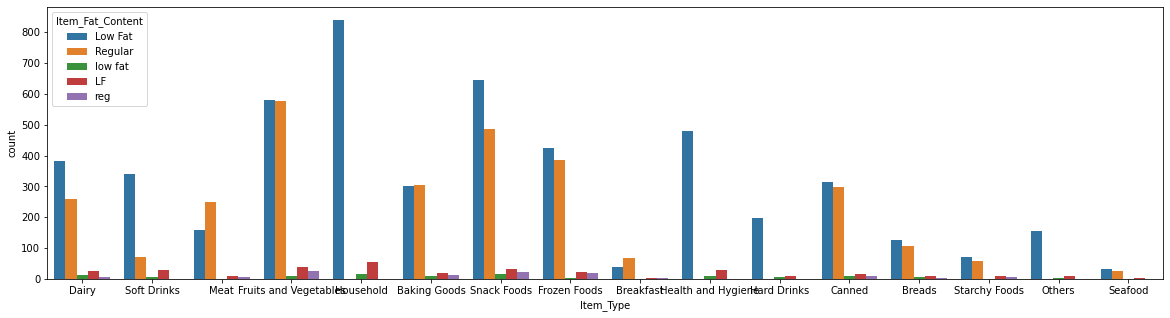

In [105]:
plt.figure(figsize=(20,5))
sns.countplot(x='Item_Type',hue='Item_Fat_Content', data=df)

In [106]:
# In every category, Low fact product are in demand, Only meat have high Fat

In [107]:
df.groupby('Item_Type')['Item_Weight'].mean()  # this can be used to fill missing values in Weight feature

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [108]:
df.groupby('Item_Identifier')['Item_Weight'].median()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [109]:
# check when Weight is null, item identifier  are in when weight is not null identifiers

In [110]:
weight_notnull=  df[df['Item_Weight'].notnull()]['Item_Identifier'].unique()
weight_notnull   # size is 1559

array(['FDA15', 'DRC01', 'FDN15', ..., 'FDU43', 'FDO49', 'NCT53'],
      dtype=object)

In [111]:
weight_null=  df[df['Item_Weight'].isnull()]['Item_Identifier'].unique()
weight_null   # size is 1142

array(['FDP10', 'DRI11', 'FDW12', ..., 'FDQ58', 'DRG13', 'NCN18'],
      dtype=object)

In [112]:
[weight_notnull ]

[array(['FDA15', 'DRC01', 'FDN15', ..., 'FDU43', 'FDO49', 'NCT53'],
       dtype=object)]

In [113]:
diff=[x for x in weight_null if not x in weight_notnull]

In [114]:
diff

['FDN52', 'FDK57', 'FDE52', 'FDQ60']

In [115]:
df[df['Item_Identifier']=='FDQ60']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [116]:

#Item code doesnt define much more.

In [117]:
# Lets fill me missing values of weight by taking median of weight by Item Type

df.groupby('Item_Type')['Item_Weight'].median().reset_index()

,Item_Type,Item_Weight
0,Baking Goods,11.650
1,Breads,10.600
2,Breakfast,10.695
3,Canned,12.150
4,Dairy,13.350
5,Frozen Foods,12.850
6,Fruits and Vegetables,13.100
7,Hard Drinks,10.100
8,Health and Hygiene,12.150
9,Household,13.150


In [118]:
# ex Baking Goods have median weight of 11.650 here, same way

In [119]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [120]:
df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('median'),inplace=True)

In [121]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [122]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Item_Visibility vs sales

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

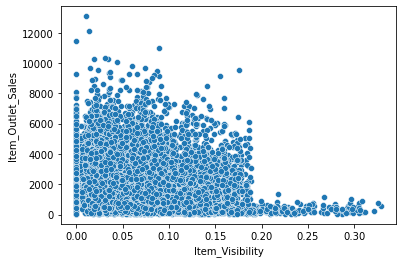

In [123]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales', data=df)

In [124]:
# Item visiblity doesnt have a direct effect on sales, although when the item is not visible, sales is less

# Outlet size vs location

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

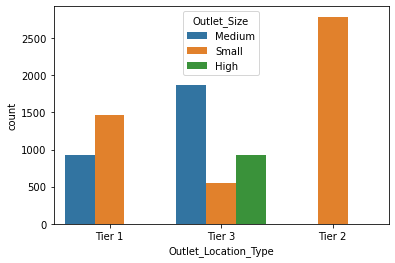

In [125]:
sns.countplot(df['Outlet_Location_Type'], hue='Outlet_Size', data=df)

In [126]:
# Tier 1 location ahve Medium and small size outlet
# Tier 2 have only Small outlets
# Tier 3 have all 3 size outlets

# Outlet_Identifier vs Year  Of Establishment

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Establishment_Year'>

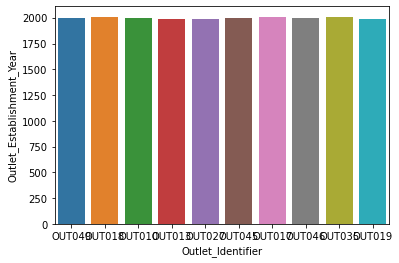

In [127]:
sns.barplot(x='Outlet_Identifier',y='Outlet_Establishment_Year', data=df)

In [128]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [129]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [130]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.013384,0.026537,0.007724,0.010188
Item_Visibility,-0.013384,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.026537,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007724,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.010188,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

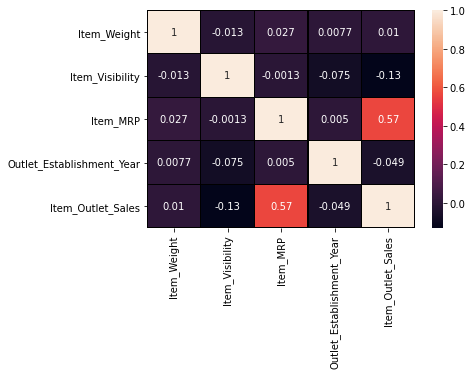

In [131]:
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=.25)

In [132]:
#conclusion:  
#Item weight have very low correlation .01
# Item viviblity have low negative correlation  -.13
#Item Mrp have good correlation  .57
# Outlet_extablish_year have low negative correlation  -.049

# Cn't see any multicolinearity issue within independent features, However check VIF

# Separate Independent and dependent columns

In [133]:
X=df.drop('Item_Outlet_Sales', axis=1)
Y= df['Item_Outlet_Sales']

In [134]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [135]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# VIF to find multicolinearity

In [136]:
num=X.select_dtypes(np.number)
num.shape

(8523, 4)

In [137]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num_standard=sc.fit_transform(num)

In [138]:
num_standard

array([[-0.82840788, -0.97073217,  1.74745381,  0.13954076],
       [-1.62536436, -0.90811123, -1.48902325,  1.33410274],
       [ 1.10503683, -0.95691733,  0.01004021,  0.13954076],
       ...,
       [-0.52188616, -0.59978449, -0.89720755,  0.73682175],
       [-1.3212005 ,  1.53287976, -0.60797692,  1.33410274],
       [ 0.46841479, -0.41193591, -1.05226104, -0.09937163]])

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF=pd.DataFrame()
VIF['Features']=num.columns
VIF['VIF']=[variance_inflation_factor(num_standard,i) for i in range(0,len(num.columns))]

In [140]:
VIF

,Features,VIF
0,Item_Weight,1.000927
1,Item_Visibility,1.005798
2,Item_MRP,1.000728
3,Outlet_Establishment_Year,1.005700


In [141]:
# VIF values in range, No Multi colinearity found

# Outliers()

In [142]:
num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009
2,17.50,0.016760,141.6180,1999
3,19.20,0.000000,182.0950,1998
4,8.93,0.000000,53.8614,1987


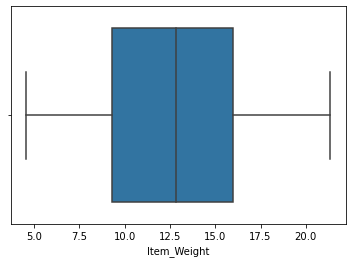

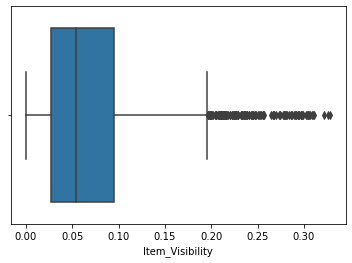

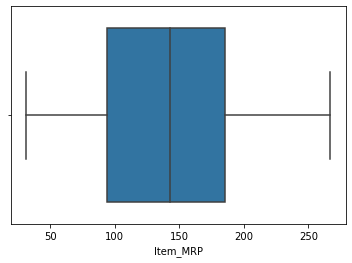

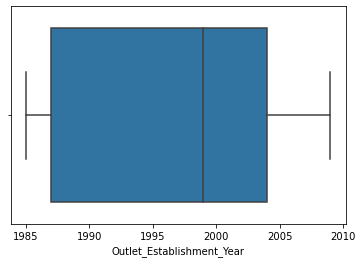

In [143]:
for i in num.columns:
    sns.boxplot(df[i])
    plt.subplot()
    plt.show()

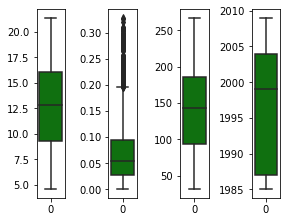

In [144]:
# With Boxplot

columnlist= num.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*nrows))
for i in range(0, len(columnlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[columnlist[i]],color='green',orient='v')
    plt.tight_layout()

<AxesSubplot:>

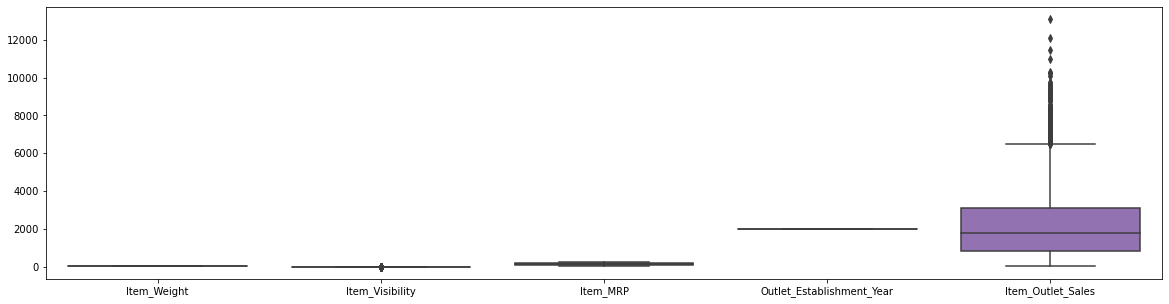

In [145]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

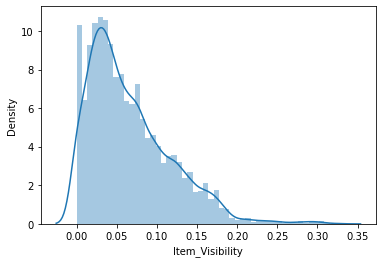

In [146]:
# COnclusion:  Item_Visibility have outliers


sns.distplot(df['Item_Visibility'])   # Lets handle with IQR method

In [147]:
X.skew()

Item_Weight                  0.118404
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
dtype: float64

In [148]:
# Visiblity have right skewed data

In [149]:
IQR= df['Item_Visibility'].quantile(.75)-df['Item_Visibility'].quantile(.25)
IQR

0.067595815

In [150]:
X['Item_Visibility'].min()

0.0

In [151]:
X['Item_Visibility'].max()

0.328390948

In [152]:
upper= X['Item_Visibility'].quantile(.75) +( 1.5 * IQR)
upper

0.195979015

In [153]:
X['Item_Visibility']=np.where(X['Item_Visibility']>upper,upper,X['Item_Visibility'])

In [154]:
X.skew()

Item_Weight                  0.118404
Item_Visibility              0.813980
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
dtype: float64

<AxesSubplot:xlabel='Item_Visibility'>

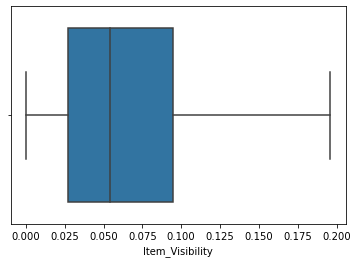

In [155]:
# After outlier handle
sns.boxplot(X['Item_Visibility'])

In [156]:
# Item_Visibility  skewness removed to some extent.
X.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [157]:
num=X.select_dtypes(np.number)

In [158]:
num.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
dtype: int64

In [159]:
num.skew()

Item_Weight                  0.118404
Item_Visibility              0.813980
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
dtype: float64

# Transformation

In [160]:
from sklearn.preprocessing import  power_transform
num_transformed=power_transform(num)   #default=’yeo-johnson’

In [161]:
pd.DataFrame(num_transformed).skew()

0   -0.064253
1    0.121515
2   -0.115386
3   -0.200959
dtype: float64

In [162]:
# It has reduced the Item_visibility skewness to limits

In [163]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num_standardize=sc.fit_transform(num_transformed)

In [164]:
num_standardize=pd.DataFrame(num_standardize)
num_standardize.columns=num.columns

In [165]:
num_standardize

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,-0.805491,-1.146839,1.623670,0.048562
1,-1.733601,-1.038894,-1.595016,1.461925
2,1.091116,-1.122756,0.081237,0.048562
3,1.444517,-1.732068,0.689968,-0.075796
4,-0.901389,-1.732068,-1.476078,-1.270835
...,...,...,...,...
8518,-1.461027,0.012458,1.148258,-1.270835
8519,-1.046219,-0.229905,-0.463127,0.439191
8520,-0.477446,-0.550399,-0.867930,0.714912
8521,-1.364334,1.491266,-0.548996,1.461925


# Encoding

In [166]:
cat=X.select_dtypes('O')

In [167]:
cat   # we have 7 columns

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Small,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [168]:
for i in cat.columns:
    print(cat[i].unique())
    print(cat[i].nunique())
    print('X'*20)

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
1559
XXXXXXXXXXXXXXXXXXXX
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
5
XXXXXXXXXXXXXXXXXXXX
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
16
XXXXXXXXXXXXXXXXXXXX
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
10
XXXXXXXXXXXXXXXXXXXX
['Medium' 'Small' 'High']
3
XXXXXXXXXXXXXXXXXXXX
['Tier 1' 'Tier 3' 'Tier 2']
3
XXXXXXXXXXXXXXXXXXXX
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
4
XXXXXXXXXXXXXXXXXXXX


In [169]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [170]:
cat['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', 'FDX07', 'NCD19', 'FDP36', 'FDO10',
       'FDP10', 'FDH17', 'FDU28', 'FDY07', 'FDA03', 'FDX32', 'FDS46',
       'FDF32', 'FDP49', 'NCB42', 'DRI11', 'FDU02', 'FDN22', 'FDW12',
       'NCB30', 'FDC37', 'FDR28', 'NCD06', 'FDV10', 'DRJ59', 'FDE51',
       'FDC14', 'FDV38', 'NCS17', 'FDP33', 'FDO23', 'DRH01', 'NCX29',
       'FDV20', 'DRZ11', 'FDX10', 'FDB34', 'FDK43', 'FDA46', 'FDC02',
       'FDL50', 'FDM39', 'NCP05', 'FDV49', 'FDL12', 'FDS02', 'NCL17',
       'FDM40', 'FDR13', 'FDA43', 'NCP18', 'FDK21', 'NCX54', 'DRK35',
       'FDY21', 'FDI26', 'FDM20', 'FDV27', 'FDF09', 'FDY40', 'FDY45',
       'FDC46', 'FDH19', 'FDZ03', 'DRH37', 'NCI17', 'FDJ58', 'FDH35',
       'FDG02', 'NCZ18', 'FDC29', 'FDQ10', 'FDN48', 'FDL04', 'FDV25',
       'FDD58', 'FDN04', 'FDV45', 'NCL18', 'FDR12', 'FDG20', 'FDZ55',
       'FDQ49', 'FDN33', 'FDN27', 'FDW20', 'DRG27', 'DRI25', 'FDA44',
       'NCR17', 'FDU04', 'FDF41', 'FDB56', 'FDT28', 'FDD10', 'FDW57',
       'DRB48', 'FDP

In [171]:
cat.shape

(8523, 7)

In [172]:
#pip install category_encoders

In [173]:
import category_encoders as ce
#Create an object for Base N Encoding
encoder= ce.BaseNEncoder(cols=['Item_Identifier'],return_df=True,base=5)

In [174]:
#Fit and Transform Data
data_encoded=encoder.fit_transform(cat['Item_Identifier'])
a=data_encoded

In [175]:
cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [176]:
encoder= ce.BinaryEncoder(cols=['Item_Type'],return_df=True)
data_encoded=encoder.fit_transform(cat['Item_Type'])
b=data_encoded

In [177]:
encoder= ce.BinaryEncoder(cols=['Outlet_Identifier'],return_df=True)
data_encoded=encoder.fit_transform(cat['Outlet_Identifier'])
c=data_encoded

In [178]:
df[['Item_Fat_Content','Outlet_Location_Type','Outlet_Type']]

,Item_Fat_Content,Outlet_Location_Type,Outlet_Type
0,Low Fat,Tier 1,Supermarket Type1
1,Regular,Tier 3,Supermarket Type2
2,Low Fat,Tier 1,Supermarket Type1
3,Regular,Tier 3,Grocery Store
4,Low Fat,Tier 3,Supermarket Type1
...,...,...,...
8518,Low Fat,Tier 3,Supermarket Type1
8519,Regular,Tier 2,Supermarket Type1
8520,Low Fat,Tier 2,Supermarket Type1
8521,Regular,Tier 3,Supermarket Type2


In [179]:
d=pd.get_dummies(df[['Item_Fat_Content','Outlet_Location_Type','Outlet_Type']], drop_first=True)

In [180]:
e=cat[['Outlet_Size']].replace({'Medium':1,'Small':0,'High':2})

In [181]:
cat_encoded= pd.concat([a,b,c,d,e], axis=1)
cat_encoded

,Item_Identifier_0,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,...,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size
0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
1,0,0,0,0,2,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
2,0,0,0,0,3,0,0,0,1,1,...,1,0,0,0,0,0,1,0,0,1
3,0,0,0,0,4,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,1,0,1,...,1,0,0,0,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,2,4,2,0,0,0,1,1,1,...,1,0,0,0,0,1,1,0,0,2
8519,2,2,1,2,3,0,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
8520,0,2,4,1,0,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
8521,1,2,1,1,4,0,0,1,1,1,...,0,1,0,0,0,1,0,1,0,1


# Combine both categorical and numerical data

In [182]:
X= pd.concat([num_standardize,cat_encoded],axis=1)

In [183]:
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_0,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4,Item_Type_0,...,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size
0,-0.805491,-1.146839,1.623670,0.048562,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
1,-1.733601,-1.038894,-1.595016,1.461925,0,0,0,0,2,0,...,0,1,0,0,0,1,0,1,0,1
2,1.091116,-1.122756,0.081237,0.048562,0,0,0,0,3,0,...,1,0,0,0,0,0,1,0,0,1
3,1.444517,-1.732068,0.689968,-0.075796,0,0,0,0,4,0,...,0,1,0,0,0,1,0,0,0,0
4,-0.901389,-1.732068,-1.476078,-1.270835,0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.461027,0.012458,1.148258,-1.270835,0,2,4,2,0,0,...,1,0,0,0,0,1,1,0,0,2
8519,-1.046219,-0.229905,-0.463127,0.439191,2,2,1,2,3,0,...,0,1,0,0,1,0,1,0,0,0
8520,-0.477446,-0.550399,-0.867930,0.714912,0,2,4,1,0,0,...,1,0,0,0,1,0,1,0,0,0
8521,-1.364334,1.491266,-0.548996,1.461925,1,2,1,1,4,0,...,0,1,0,0,0,1,0,1,0,1


In [184]:
Y=pd.DataFrame(Y)

In [185]:
Y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


# Machine Learning

In [186]:
# Its a Regression problem coz output variable have continuous data, sales prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

LR= LinearRegression()

In [187]:
# Train Test Split / finding best random_state for my model

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.2)
    LR.fit(x_train,y_train)
    train_pred=LR.predict(x_train)
    test_pred=LR.predict(x_test)
    if round(r2_score(y_test,test_pred),3)==round(r2_score(y_train,train_pred),3):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X'*50,'\n')

At random state  8 The model performance very well
At random state:  8
Test R2 score is:  0.56
Train R2 score is:  0.56
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  26 The model performance very well
At random state:  26
Test R2 score is:  0.56
Train R2 score is:  0.56
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  29 The model performance very well
At random state:  29
Test R2 score is:  0.56
Train R2 score is:  0.56
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  31 The model performance very well
At random state:  31
Test R2 score is:  0.56
Train R2 score is:  0.56
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  35 The model performance very well
At random state:  35
Test R2 score is:  0.56
Train R2 score is:  0.56
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  43 The model performance very well
At random state:  43
Test R2 score is:  0.56
Train R2 score is:  0.56
XXXXX

In [188]:
# Lets take random state 43

x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=43,test_size=.2)
LR.fit(x_train,y_train)

LinearRegression()

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [190]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()


model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model ]

In [191]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    

mean_absolute_error of  LinearRegression() model 814.8901558200536
mean_square_error of LinearRegression() model 1227793.150072036
R2 Score of LinearRegression() model 56.182937371984075
mean_absolute_error of  Ridge() model 814.8808530688569
mean_square_error of Ridge() model 1227791.8452742097
R2 Score of Ridge() model 56.1829839371633
mean_absolute_error of  Lasso() model 814.3348946211663
mean_square_error of Lasso() model 1226446.1229325521
R2 Score of Lasso() model 56.231009616505844
mean_absolute_error of  DecisionTreeRegressor() model 1072.249617829912
mean_square_error of DecisionTreeRegressor() model 2404909.248288783
R2 Score of DecisionTreeRegressor() model 14.174420063524751
mean_absolute_error of  SVR() model 1226.8369551138394
mean_square_error of SVR() model 2730144.7972701653
R2 Score of SVR() model 2.567524864819448
mean_absolute_error of  KNeighborsRegressor() model 922.5218584398826
mean_square_error of KNeighborsRegressor() model 1610086.1512371204
R2 Score of KNei

# Saving the model with Linear Regression

In [192]:
import joblib

In [193]:
joblib.dump(LR_model,'BigData.pkl')

['BigData.pkl']